<a href="https://colab.research.google.com/github/gauravvojha/Cognifyz_DataScience_tasks/blob/main/task1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [2]:
df = pd.read_csv('/content/restaurant_data.csv')

# Display the first few rows of the dataset

In [3]:
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas,

# Display the number of rows and columns

In [4]:
print("\nNumber of rows and columns:")
print(df.shape)


Number of rows and columns:
(4411, 21)


# Step 2: Check for missing values and handle them

In [5]:
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Restaurant ID            0
Restaurant Name          0
Country Code             0
City                     0
Address                  0
Locality                 0
Locality Verbose         0
Longitude                0
Latitude                 0
Cuisines                10
Average Cost for two     1
Currency                 1
Has Table booking        1
Has Online delivery      1
Is delivering now        1
Switch to order menu     1
Price range              1
Aggregate rating         1
Rating color             1
Rating text              1
Votes                    1
dtype: int64


# Handling missing values

In [6]:
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].median(), inplace=True)

In [7]:
print("\nMissing values after handling them:")
print(df.isnull().sum())


Missing values after handling them:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


# Step 3: Perform data type conversion if necessary

In [8]:
print("\nData types before conversion:")
print(df.dtypes)


Data types before conversion:
Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two    float64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range             float64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                   float64
dtype: object


# Convert 'Aggregate rating' to float if it's not already

In [9]:
df['Aggregate rating'] = df['Aggregate rating'].astype(float)

In [10]:
print("\nData types after conversion:")
print(df.dtypes)


Data types after conversion:
Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two    float64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range             float64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                   float64
dtype: object


# Step 4: Analyze the distribution of the target variable ("Aggregate rating")

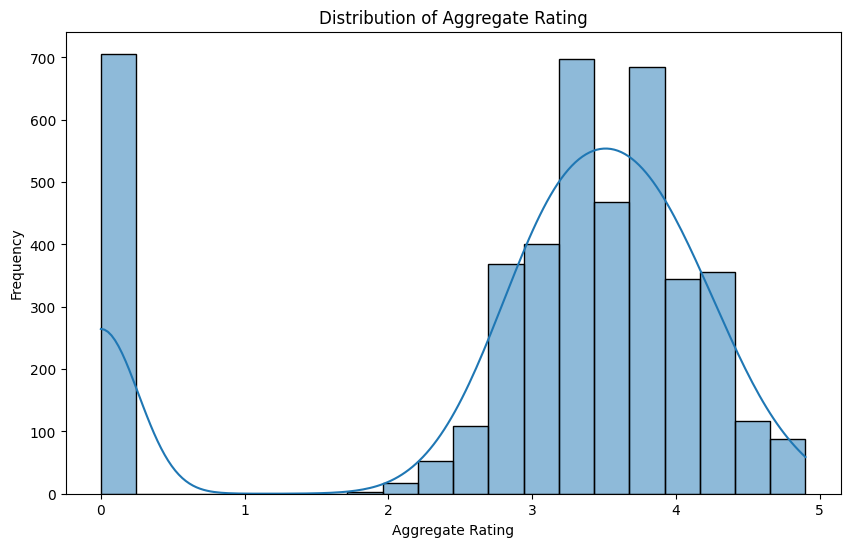

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Aggregate rating'], bins=20, kde=True)
plt.title('Distribution of Aggregate Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.show()

In [12]:
rating_counts = df['Aggregate rating'].value_counts().sort_index()
print("\nValue counts of 'Aggregate rating':")
print(rating_counts)


Value counts of 'Aggregate rating':
Aggregate rating
0.0    706
1.8      1
1.9      1
2.0      1
2.1      4
2.2     13
2.3     14
2.4     39
2.5     41
2.6     68
2.7     93
2.8    133
2.9    142
3.0    190
3.1    210
3.2    239
3.3    217
3.4    242
3.5    233
3.6    235
3.7    237
3.8    232
3.9    215
4.0    165
4.1    179
4.2    140
4.3    121
4.4     95
4.5     62
4.6     55
4.7     27
4.8     19
4.9     42
Name: count, dtype: int64


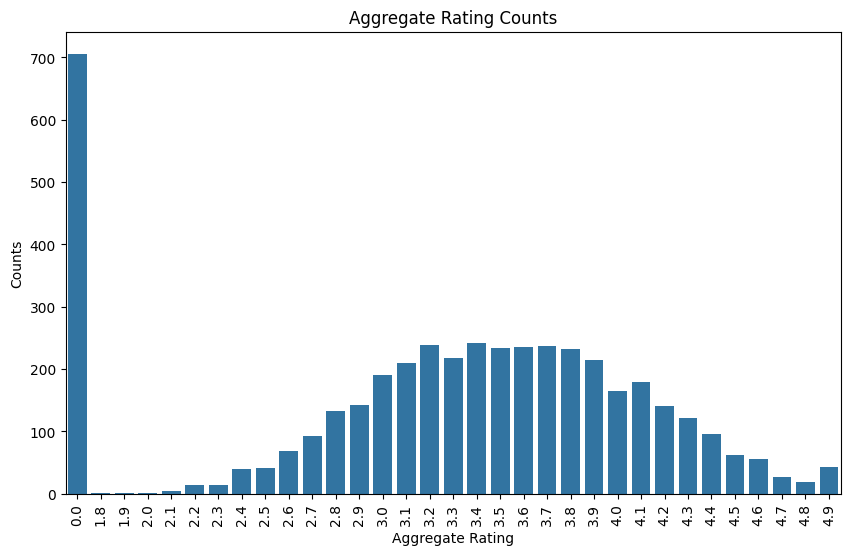

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values)
plt.title('Aggregate Rating Counts')
plt.xlabel('Aggregate Rating')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.show()

# Step 5: Calculate basic statistical measures for numerical columns

In [14]:
print("\nBasic statistical measures for numerical columns:")
print(df.describe())


Basic statistical measures for numerical columns:
       Restaurant ID  Country Code    Longitude     Latitude  \
count   4.411000e+03   4411.000000  4411.000000  4411.000000   
mean    9.010723e+06     27.181818    55.460764    25.883016   
std     8.745974e+06     69.104814    54.476653    10.474276   
min     5.300000e+01      1.000000  -157.948486   -38.634746   
25%     3.016990e+05      1.000000    77.030923    28.434707   
50%     5.600556e+06      1.000000    77.117637    28.532966   
75%     1.831195e+07      1.000000    77.239954    28.634623   
max     1.850065e+07    216.000000   153.593331    52.008289   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           4411.000000  4411.000000       4411.000000   4411.000000  
mean             614.450918     1.948764          2.979460    230.217184  
std              611.296172     0.931488          1.398201    565.582832  
min                0.000000     1.000000          0.000000      0.000000

# Step 6: Explore the distribution of categorical variables

In [15]:
print("\nDistribution of 'Country Code':")
country_counts = df['Country Code'].value_counts()
print(country_counts)


Distribution of 'Country Code':
Country Code
1      3787
216     434
30       60
214      60
14       24
162      22
184      20
37        4
Name: count, dtype: int64


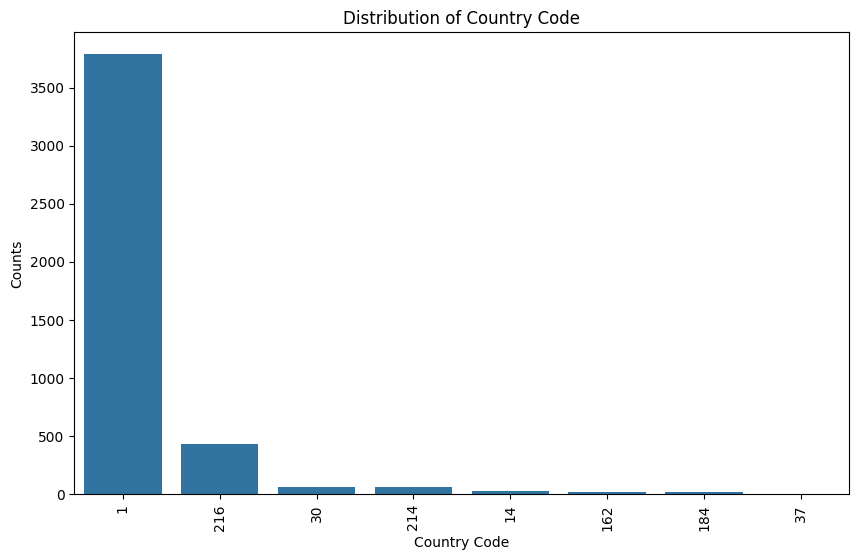

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Country Code', data=df, order=country_counts.index)
plt.title('Distribution of Country Code')
plt.xlabel('Country Code')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.show()

# Cuisines

In [17]:
print("\nDistribution of 'Cuisines':")
cuisine_counts = df['Cuisines'].value_counts().head(20)  # Displaying top 20 cuisines for better visualization
print(cuisine_counts)


Distribution of 'Cuisines':
Cuisines
North Indian                          364
North Indian, Chinese                 212
North Indian, Mughlai                 146
Cafe                                  146
Fast Food                             132
Chinese                               126
Bakery                                 89
Bakery, Desserts                       78
North Indian, Mughlai, Chinese         72
Mughlai                                50
Street Food                            48
Bakery, Fast Food                      44
Pizza, Fast Food                       44
Mithai, Street Food                    43
South Indian                           40
North Indian, Chinese, Continental     38
Chinese, North Indian                  37
Italian                                36
Ice Cream                              35
Chinese, Fast Food                     35
Name: count, dtype: int64


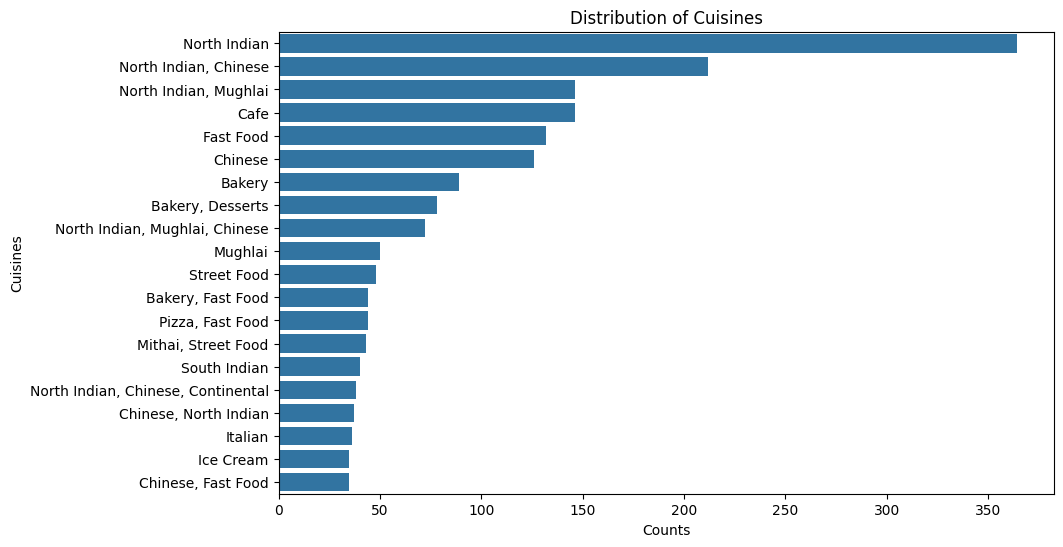

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Cuisines', data=df, order=cuisine_counts.index)
plt.title('Distribution of Cuisines')
plt.xlabel('Counts')
plt.ylabel('Cuisines')
plt.show()

# City

In [19]:
print("\nDistribution of 'City':")
city_counts = df['City'].value_counts().head(20)  # Displaying top 20 cities for better visualization
print(city_counts)


Distribution of 'City':
City
New Delhi       1851
Gurgaon         1118
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Ahmedabad         21
Lucknow           21
Guwahati          21
Sharjah           20
Allahabad         20
Agra              20
Dubai             20
Bangalore         20
Abu Dhabi         20
Waterloo          20
Valdosta          20
Tampa Bay         20
Sioux City        20
Singapore         20
Name: count, dtype: int64


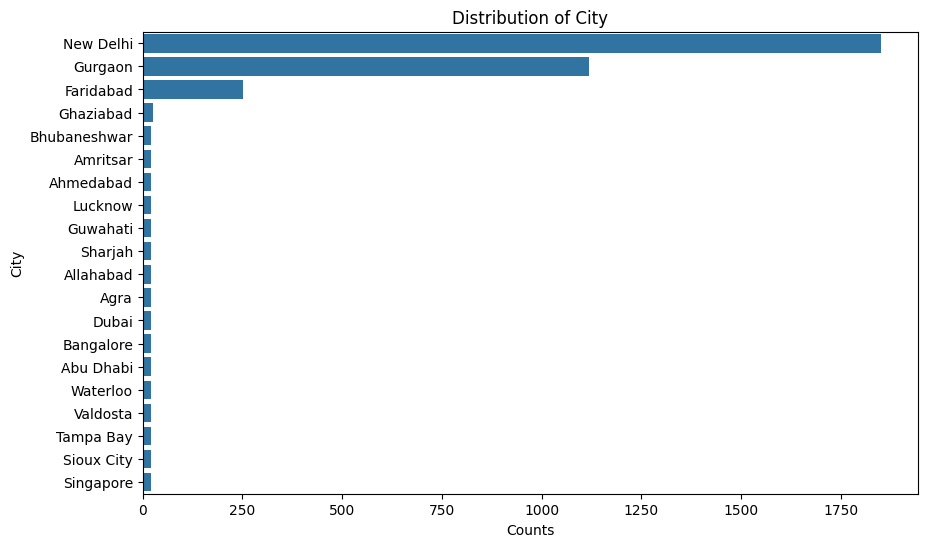

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(y='City', data=df, order=city_counts.index)
plt.title('Distribution of City')
plt.xlabel('Counts')
plt.ylabel('City')
plt.show()

# Step 7: Identify the top cuisines and cities with the highest number of restaurants

In [21]:
top_cuisines = df['Cuisines'].value_counts().head(10)
print("\nTop 10 Cuisines with highest number of restaurants:")
print(top_cuisines)


Top 10 Cuisines with highest number of restaurants:
Cuisines
North Indian                      364
North Indian, Chinese             212
North Indian, Mughlai             146
Cafe                              146
Fast Food                         132
Chinese                           126
Bakery                             89
Bakery, Desserts                   78
North Indian, Mughlai, Chinese     72
Mughlai                            50
Name: count, dtype: int64


In [22]:
top_cities = df['City'].value_counts().head(10)
print("\nTop 10 Cities with highest number of restaurants:")
print(top_cities)


Top 10 Cities with highest number of restaurants:
City
New Delhi       1851
Gurgaon         1118
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Ahmedabad         21
Lucknow           21
Guwahati          21
Sharjah           20
Name: count, dtype: int64
